In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('country_wise_latest.csv')
vac_df = pd.read_csv('country_vaccinations.csv')

## Basic info

In [3]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [4]:
df.shape

(187, 15)

In [5]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [7]:
df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'G

In [8]:
df['Country/Region'].nunique()

187

total numbeer of unique countries in dataset are 187.

In [9]:
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

There are no null values in the dataset.

# project 2

In [10]:
df[['Country/Region' , 'Confirmed']].max()

Country/Region    Zimbabwe
Confirmed          4290259
dtype: object

Zimbabwe has the highest confirmed cases.

In [11]:
df[['Country/Region' , 'Deaths']].max()

Country/Region    Zimbabwe
Deaths              148011
dtype: object

Zimbabwe tallies highest in number of deaths.

# Project 3

In [12]:
# average cases in country

total_cnfrm = df.Confirmed.sum()
avg_cases = total_cnfrm/df["Country/Region"].count()

In [13]:
print("average cases in a country = ", avg_cases)

average cases in a country =  88130.935828877


In [14]:
print("total number of deaths as per dataset = ",df.Deaths.sum())

total number of deaths as per dataset =  654036


In [15]:
print("total number of confirmed cases as per dataset = ",total_cnfrm)

total number of confirmed cases as per dataset =  16480485


# Project 4

In [16]:
df.isna().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

since there are no null values. We don't need to impute.

# Project 5

In [17]:
vac_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [18]:
vac_df.shape

(86512, 15)

In [19]:
vac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

### Adding Day , Month and year Columns

In [20]:
day = []
for i in vac_df['date']:
    day.append(int(i[-2:]))
vac_df['Day'] = day

In [21]:
month = []
for i in vac_df['date']:
    month.append(int(i[5:7]))
vac_df['Month'] = month

In [22]:
year = []
for i in vac_df['date']:
    year.append(int(i[:4]))
vac_df['Year'] = year

In [23]:
vac_df.shape

(86512, 18)

In [24]:
vac_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Day,Month,Year
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,22,2,2021
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,23,2,2021
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,24,2,2021
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,25,2,2021
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,26,2,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86507,Zimbabwe,ZWE,2022-03-25,8691642.0,4814582.0,3473523.0,139213.0,69579.0,57.59,31.90,23.02,4610.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,25,3,2022
86508,Zimbabwe,ZWE,2022-03-26,8791728.0,4886242.0,3487962.0,100086.0,83429.0,58.25,32.38,23.11,5528.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,26,3,2022
86509,Zimbabwe,ZWE,2022-03-27,8845039.0,4918147.0,3493763.0,53311.0,90629.0,58.61,32.59,23.15,6005.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,27,3,2022
86510,Zimbabwe,ZWE,2022-03-28,8934360.0,4975433.0,3501493.0,89321.0,100614.0,59.20,32.97,23.20,6667.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,28,3,2022


# Project 6

### Adding Month Names

In [25]:
month_names = []

for i in month:
    if i == 1:
        month_names.append("January")
    elif i == 2:
        month_names.append("February")
    elif i == 3:
        month_names.append("March")
    elif i == 4:
        month_names.append("April")
    elif i == 5:
        month_names.append("May")
    elif i == 6:
        month_names.append("June")
    elif i == 7:
        month_names.append("July")
    elif i == 8:
        month_names.append("August")
    elif i == 9:
        month_names.append("September")
    elif i == 10:
        month_names.append("October")
    elif i == 11:
        month_names.append("November")
    elif i == 12:
        month_names.append("December")

In [26]:
vac_df["Month/Names"] = month_names

In [27]:
vac_df[["Day","Month","Month/Names","Year"]]

,Day,Month,Month/Names,Year
0,22,2,February,2021
1,23,2,February,2021
2,24,2,February,2021
3,25,2,February,2021
4,26,2,February,2021
...,...,...,...,...
86507,25,3,March,2022
86508,26,3,March,2022
86509,27,3,March,2022
86510,28,3,March,2022


# Project 7

In [28]:
data_values = vac_df.values

In [29]:
vac_df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website', 'Day', 'Month', 'Year',
       'Month/Names'],
      dtype='object')

### Number of people vaccinated in India in May 2021

First we have to fill missing values in  people_vaccinated column.

In [30]:
imputer = SimpleImputer(strategy='most_frequent')

In [31]:
data_values[:,3:11].shape

(86512, 8)

In [32]:
vac_df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website', 'Day', 'Month', 'Year',
       'Month/Names'],
      dtype='object')

In [33]:
imputer.fit(data_values[:,3:12])

SimpleImputer(strategy='most_frequent')

In [34]:
data_values[:,3:12] = imputer.transform(data_values[:,3:12])

In [35]:
null_numeric = [ 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred','daily_vaccinations_per_million']

In [36]:
i = 3
for values in null_numeric:
    while(i<12):
        if i == 3:
            vac_df[values] = data_values[:,i]
            break
        if i == 4:
            vac_df[values] = data_values[:,i]
            break
        if i == 5:
            vac_df[values] = data_values[:,i]
            break
        if i == 6:
            vac_df[values] = data_values[:,i]
            break
        if i == 7:
            vac_df[values] = data_values[:,i]
            break
        if i == 8:
            vac_df[values] = data_values[:,i]
            break
        if i == 9:
            vac_df[values] = data_values[:,i]
            break
        if i == 10:
            vac_df[values] = data_values[:,i]
            break
        if i == 11:
            vac_df[values] = data_values[:,i]
            break
        
    i+=1

In [37]:
vac_df['total_vaccinations']

0              0.0
1              0.0
2              0.0
3              0.0
4              0.0
           ...    
86507    8691642.0
86508    8791728.0
86509    8845039.0
86510    8934360.0
86511    9039729.0
Name: total_vaccinations, Length: 86512, dtype: object

In [38]:
vac_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   country                              86512 non-null  object
 1   iso_code                             86512 non-null  object
 2   date                                 86512 non-null  object
 3   total_vaccinations                   86512 non-null  object
 4   people_vaccinated                    86512 non-null  object
 5   people_fully_vaccinated              86512 non-null  object
 6   daily_vaccinations_raw               86512 non-null  object
 7   daily_vaccinations                   86512 non-null  object
 8   total_vaccinations_per_hundred       86512 non-null  object
 9   people_vaccinated_per_hundred        86512 non-null  object
 10  people_fully_vaccinated_per_hundred  86512 non-null  object
 11  daily_vaccinations_per_million       8651

In [39]:
vac_ = []
for i in data_values:
    if ( i[-1] == 'May' and i[0] == 'India' and i[-2]):
        vac_.append(int(i[4]))
        
print(sum(vac_) , "people were vaccinated in India in May 2021")

4297974308 people were vaccinated in India in May 2021


### People Vaccinated on 2022-01-12 in Albania

In [40]:
for i in data_values:
    if i[2] == '2022-01-12' and i[0] == 'Albania':
        print(i[4] , 'people were vaccinated in Albania on ', i[2])


0.0 people were vaccinated in Albania on  2022-01-12


# Project 8

In [41]:
countries = list(set(data_values[: , 0]))

In [42]:
len(data_values[: , 0]), len(countries)

(86512, 223)

In [43]:
vals = []
for i in countries:
    lst = []
    for j in data_values:
        if i == j[0]:
            lst.append(j[4])
    vals.append(sum(lst))

In [44]:
dict = {"countries" : countries,
       "total_vaccinations":vals}

In [45]:
new_df = pd.DataFrame(data = dict )
pd.options.display.float_format = '{:.2f}'.format

In [46]:
new_df.head()

,countries,total_vaccinations
0,New Zealand,912748327.00
1,Benin,22995631.00
2,Lithuania,571194255.00
3,Singapore,1468018722.00
4,Belgium,2763652487.00


### Country with most number of vaccinations

In [47]:
new_df.sort_values(by = "total_vaccinations" , ascending = False).head(10)

,countries,total_vaccinations
16,India,205819738338.00
209,United States,80025415381.00
202,Brazil,43447732662.00
9,Indonesia,34926315843.00
88,China,21606369000.00
99,Germany,18851798732.00
140,United Kingdom,18238350750.00
42,Mexico,16486469275.00
219,Turkey,16076281743.00
203,France,15843577693.00


<b>India</b> is the country with <b>most number of total vaccinations </b> followed by US and Brazil.

### Country with least vaccinations

In [48]:
new_df.sort_values(by = "total_vaccinations" , ascending = True).head(10)

,countries,total_vaccinations
130,Pitcairn,235.00
71,Tokelau,2889.00
91,Niue,6074.00
222,Falkland Islands,10671.00
22,Saint Helena,19580.00
108,Bonaire Sint Eustatius and Saba,24835.00
30,Tuvalu,34166.00
149,Montserrat,50662.00
17,Nauru,77773.00
156,Burundi,101738.00


<b>Pitcarin</b> is the country with <b>least number of total vaccinations </b> followed by Toklau and Niue.

# Project 9

In [49]:
vac_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Day,Month,Year,Month/Names
0,Afghanistan,AFG,2021-02-22,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,22,2,2021,February
1,Afghanistan,AFG,2021-02-23,0.00,0.00,1.00,0.00,1367.00,0.00,0.00,0.00,34.00,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,23,2,2021,February
2,Afghanistan,AFG,2021-02-24,0.00,0.00,1.00,0.00,1367.00,0.00,0.00,0.00,34.00,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,24,2,2021,February
3,Afghanistan,AFG,2021-02-25,0.00,0.00,1.00,0.00,1367.00,0.00,0.00,0.00,34.00,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,25,2,2021,February
4,Afghanistan,AFG,2021-02-26,0.00,0.00,1.00,0.00,1367.00,0.00,0.00,0.00,34.00,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,26,2,2021,February


In [50]:
vac_df['Year'].unique()

array([2021, 2022, 2020], dtype=int64)

In [51]:
data_values[: , -2]

array([2021, 2021, 2021, ..., 2022, 2022, 2022], dtype=object)

### Number of vaccinations per month in 2021

In [52]:
vac_month = []
for month in vac_df['Month/Names'].unique():
    list = []
    for data in data_values:
        if month == data[:][-1] and data[:][-2] == 2021:
            list.append(data[:][3])
    vac_month.append([month ,sum(list)])
    

In [53]:
df_month = pd.DataFrame(data = vac_month , columns = ['Months' , 'total_vaccinations/month'])

In [54]:
df_month

,Months,total_vaccinations/month
0,February,4511692243.00
1,March,12370498506.00
2,April,26638153919.00
3,May,46939663406.00
4,June,75009721988.00
5,July,108476702477.00
6,August,141091163032.00
7,September,165202298502.00
8,October,190039710952.00
9,November,208464393532.00


# Project 10

#### 1. total nuber of vaccinations in India in 2020 , 2021 , 2022 

In [56]:
df = vac_df[vac_df['country'] == 'India']

In [58]:
df.groupby('Year')['total_vaccinations'].sum()

Year
2021   174118546779.00
2022   149321759019.00
Name: total_vaccinations, dtype: object

There were no vaccinations in 2020.

#### 2. Comparison of total vaccination in USA and India in the  year 2020 

as per our analysis we found that there were no vaccinations in India in 2020 . India officially launched it's vaccination program on 16 january 2021

##### Number of vaccinations in USA - 2020

In [59]:
df = vac_df[vac_df['country'] == 'United States']

In [60]:
df.shape

(471, 19)

In [61]:
df.groupby('Year')['total_vaccinations'].sum()

Year
2020       41094416.00
2021   107404688550.00
2022    47568084242.00
Name: total_vaccinations, dtype: object

We can clearly see that US was ahead of India in vaccination in year 2020. 

#### 3. Comparison of total vaccination in China and India in the  year 2021.

In [62]:
df = vac_df[vac_df['country'] == 'India']
df = df[df['Year'] == 2021]

print("total vaccination in India - 2021 : ", df['total_vaccinations'].sum())

total vaccination in India - 2021 :  174118546779.0


In [63]:
df = vac_df[vac_df['country'] == 'India']
df = df[df['Year'] == 2021]

print("total vaccination in India - 2021 : ", df['total_vaccinations'].sum())

total vaccination in India - 2021 :  174118546779.0


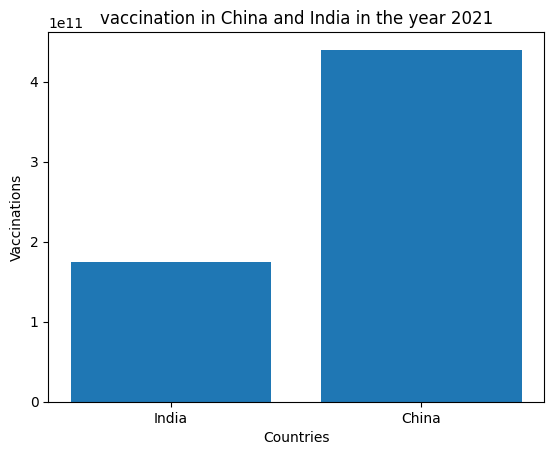

In [64]:
countries = ['India', 'China']
vaccinations = [174118546779.0 , 440076944700.0]

plt.bar(countries, vaccinations)

plt.xlabel("Countries")
plt.ylabel("Vaccinations")

plt.title("vaccination in China and India in the year 2021")

plt.show()

China had high vaccination in 2021

#### 4. Number of vaccinations each month in India in the  year 2021.

In [65]:
df = vac_df[vac_df['country'] == 'India']
df = df[df['Year'] == 2021]

In [66]:
df.groupby('Month/Names')['total_vaccinations'].sum()

Month/Names
April        3038130111.00
August      15593466811.00
December    41934918790.00
February      237762147.00
January        28323206.00
July        11129697938.00
June         7930055407.00
March        1166006861.00
May          5432545301.00
November    34164994865.00
October     30299754484.00
September   23162890858.00
Name: total_vaccinations, dtype: object

In [67]:
df_vals = df.values

In [68]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,Day,Month,Year,Month/Names
35372,India,IND,2021-01-15,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/,15,1,2021,January
35373,India,IND,2021-01-16,191181.00,191181.00,1.00,191181.00,191181.00,0.01,0.01,0.00,137.00,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/,16,1,2021,January
35374,India,IND,2021-01-17,224301.00,224301.00,1.00,33120.00,112150.00,0.02,0.02,0.00,80.00,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/,17,1,2021,January
35375,India,IND,2021-01-18,454049.00,454049.00,1.00,229748.00,151350.00,0.03,0.03,0.00,109.00,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/,18,1,2021,January
35376,India,IND,2021-01-19,674835.00,674835.00,1.00,220786.00,168709.00,0.05,0.05,0.00,121.00,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://dashboard.cowin.gov.in/,19,1,2021,January


In [69]:
vac_month = []
for month in df['Month/Names'].unique():
    list = []
    for data in df_vals:
        if month == data[:][-1] :
            list.append(data[:][3])
    vac_month.append([month ,sum(list)])
         
        

In [70]:
df = pd.DataFrame(vac_month , columns = ['Month', 'total_vaccination'])

In [71]:
df

,Month,total_vaccination
0,January,28323206.00
1,February,237762147.00
2,March,1166006861.00
3,April,3038130111.00
4,May,5432545301.00
5,June,7930055407.00
6,July,11129697938.00
7,August,15593466811.00
8,September,23162890858.00
9,October,30299754484.00


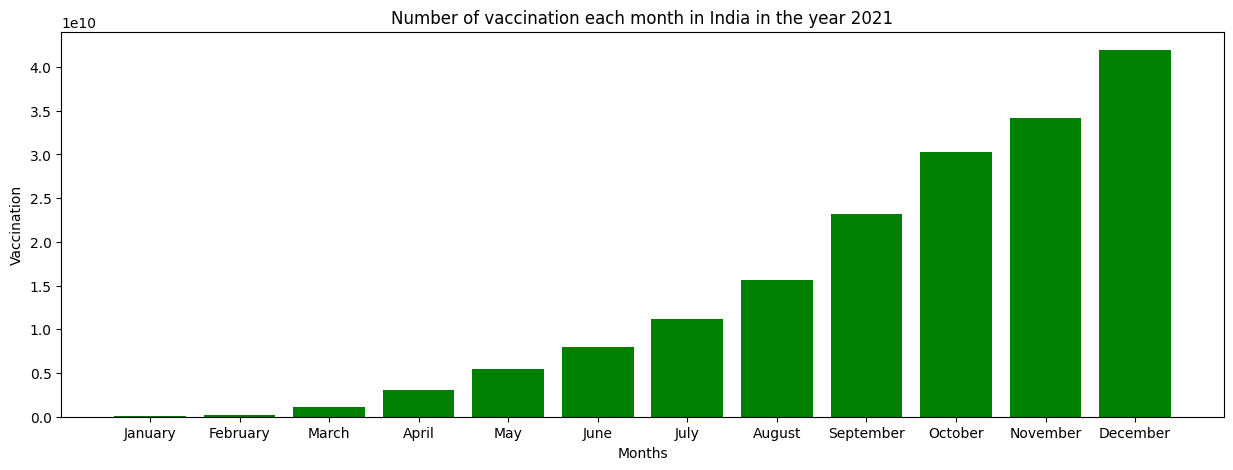

In [72]:
plt.figure(figsize = (15,5))

plt.bar(df.Month , df.total_vaccination , color = 'g' )

plt.title('Number of vaccination each month in India in the year 2021')

plt.xlabel('Months')
plt.ylabel('Vaccination')

plt.show()

#### 5. Which month has the most number of total vaccinations in india in 2021

As per above graph <b>December</b> month has most number of vaccination in year 2021.